In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn
from sklearn import linear_model

In [2]:
data = pd.read_csv("student-mat.csv" , sep = ";")

In [3]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data = data[["G1","G2","G3","studytime","failures","absences"]]

In [5]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


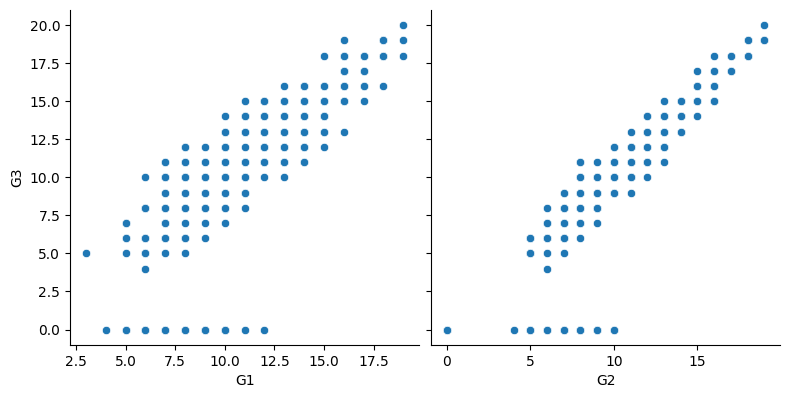

In [6]:
sns.pairplot(data, x_vars=['G1', 'G2'], y_vars='G3', height=4, aspect=1, kind='scatter')
plt.show()

In [7]:
x = data[["G2"]]
y = data["G3"]

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [9]:
linear = linear_model.LinearRegression()

In [10]:
linear.fit(x_train, y_train)

LinearRegression()

In [11]:
intercept = linear.intercept_
coef = linear.coef_
print('Intercept: ', intercept)
print('Coefficient:', coef)

Intercept:  -1.3964026473099889
Coefficient: [1.10575462]


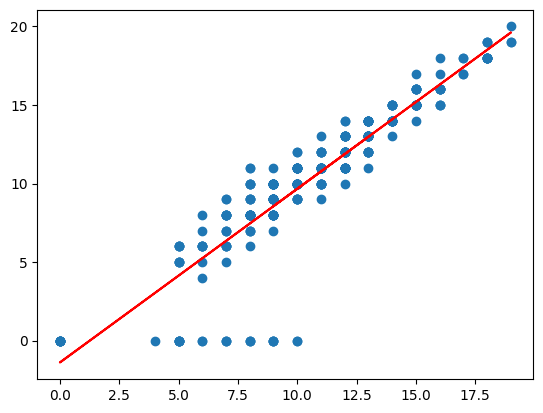

In [12]:
plt.scatter(x_train, y_train)
plt.plot(x_train, intercept + coef*x_train, 'r')
plt.show()

In [13]:
predictions = linear.predict(x_test)

In [14]:
frame = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
frame

,Actual value,Predicted value
124,8,6.343880
117,13,14.084162
245,18,18.507181
144,0,-1.396403
112,13,12.978407
50,13,12.978407
358,10,9.661144
357,11,11.872653
239,0,6.343880
210,8,7.449634


In [15]:
guess = [[16]]
linear.predict(guess)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.29567131])

In [16]:
print('R squared value of the model: {:.2f}'.format(linear.score(x_test,y_test)*100))

R squared value of the model: 83.67
